<a href="https://colab.research.google.com/github/gwegayhu/dashboards-app/blob/master/Geospatial_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install geopandas shapely fiona pyproj rasterio scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 61.3 MB/s eta 0:00:00


In [5]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from shapely.geometry import Point
from sklearn.preprocessing import StandardScaler

# Load geospatial data
def load_geospatial_data(file_path):
    # Reads shapefile or GeoJSON file into a GeoDataFrame
    gdf = gpd.read_file(file_path)
    return gdf

# Visualize Geospatial Data
def visualize_geospatial_data(gdf, column=None):
    # Plot the geospatial data
    ax = gdf.plot(figsize=(10, 10), color='lightblue', edgecolor='black')

    if column:
        gdf.plot(column=column, ax=ax, legend=True, cmap='viridis')

    plt.title("Geospatial Data Visualization")
    plt.show()

# Perform KMeans clustering on geospatial data
def perform_kmeans_clustering(gdf, n_clusters=3):
    # Assuming we have latitudes and longitudes as columns in the GeoDataFrame
    coords = gdf[['geometry']].apply(lambda geom: [geom.x, geom.y], axis=1)
    coords = np.array(coords.tolist())

    # Standardize the coordinates before clustering
    scaler = StandardScaler()
    coords = scaler.fit_transform(coords)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    gdf['cluster'] = kmeans.fit_predict(coords)

    # Visualize clusters
    visualize_geospatial_data(gdf, column='cluster')

    return gdf, kmeans

# Predictive Analysis using Decision Tree Regression (Example: Predicting Values)
def predictive_analysis(gdf, target_column, feature_columns):
    # Assuming that target_column is the column you want to predict based on features (lat, long, or other geospatial data)

    # Prepare feature data and target data
    X = gdf[feature_columns]
    y = gdf[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the decision tree regression model
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    # Plot feature importance (optional)
    feature_importance = model.feature_importances_
    plt.barh(feature_columns, feature_importance)
    plt.title("Feature Importance")
    plt.show()

    return model, mse

# Example of data with lat, long, and other attributes
def perform_kmeans_clustering(gdf, n_clusters=3):
    # Assuming we have latitudes and longitudes as columns in the GeoDataFrame
    # Access geometry using index 'geometry' and then access x and y
    coords = gdf[['geometry']].apply(lambda row: [row['geometry'].x, row['geometry'].y], axis=1)
    coords = np.array(coords.tolist())

    # Standardize the coordinates before clustering
    scaler = StandardScaler()
    coords = scaler.fit_transform(coords)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    gdf['cluster'] = kmeans.fit_predict(coords)

    # Visualize clusters
    visualize_geospatial_data(gdf, column='cluster')

    return gdf, kmeans


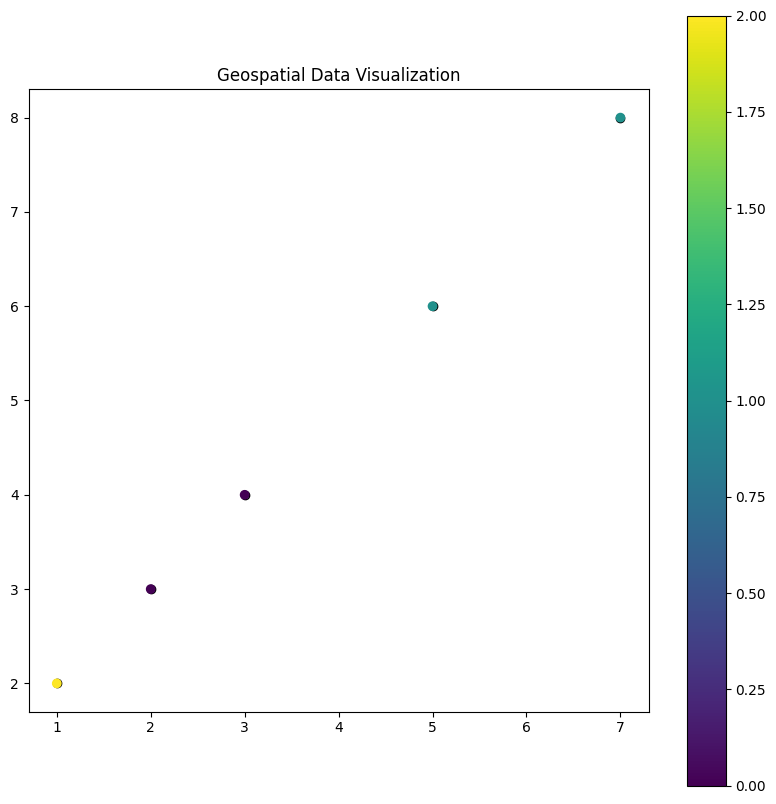

GeoDataFrame with Cluster Assignments:
      geometry  temperature  humidity  cluster
0  POINT (1 2)           22        60        2
1  POINT (2 3)           23        65        0
2  POINT (3 4)           21        70        0
3  POINT (5 6)           25        50        1
4  POINT (7 8)           26        55        1


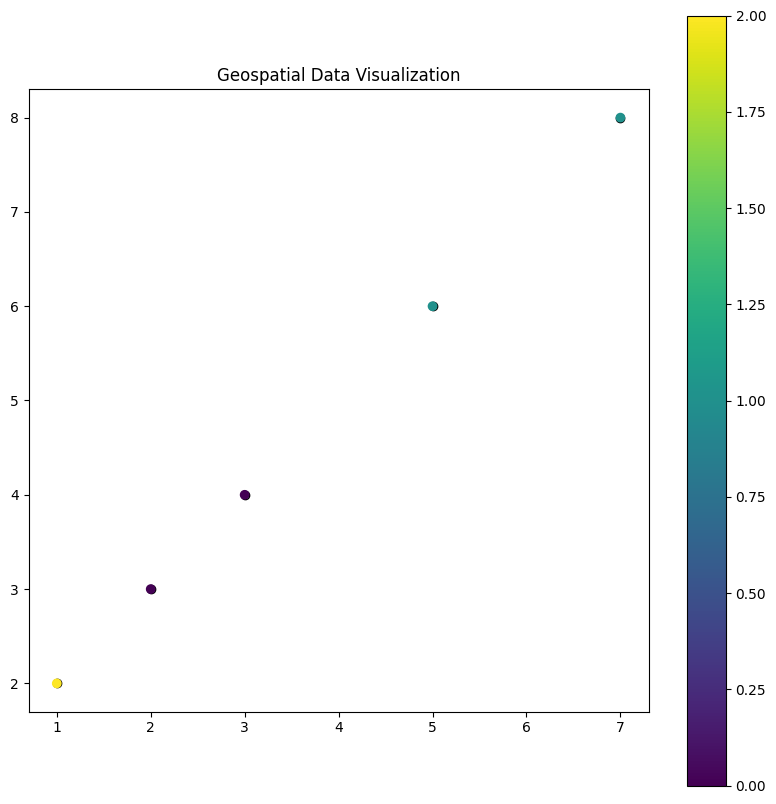

Mean Squared Error: 1.0


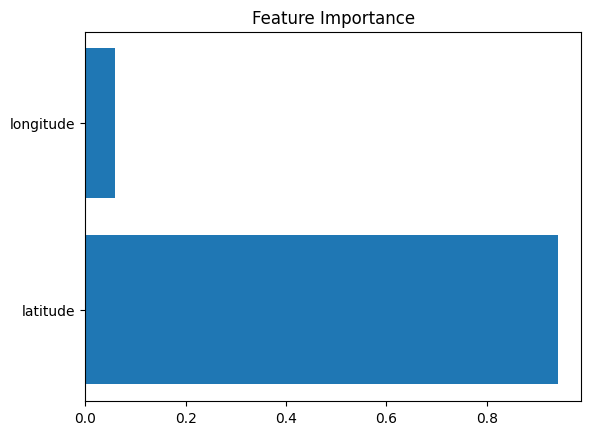


Mean Squared Error from Predictive Analysis: 1.0


In [9]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from shapely.geometry import Point
from sklearn.preprocessing import StandardScaler

# ... (rest of your existing code) ...

# Example of data with lat, long, and other attributes
data = {
    'geometry': [Point(1, 2), Point(2, 3), Point(3, 4), Point(5, 6), Point(7, 8)],
    'temperature': [22, 23, 21, 25, 26],  # Example target variable
    'humidity': [60, 65, 70, 50, 55]  # Example feature variables
}

# Create a GeoDataFrame from the data
gdf = gpd.GeoDataFrame(data, crs="EPSG:4326")

# Perform KMeans clustering
gdf, kmeans = perform_kmeans_clustering(gdf, n_clusters=3)

# Print the updated GeoDataFrame with cluster assignments
print("GeoDataFrame with Cluster Assignments:")
print(gdf)

# Visualizing the clusters (this is already in your code)
visualize_geospatial_data(gdf, column='cluster')

# Extract latitude and longitude from geometry before predictive analysis
gdf['latitude'] = gdf['geometry'].apply(lambda point: point.y)  # Extract latitude (y-coordinate)
gdf['longitude'] = gdf['geometry'].apply(lambda point: point.x)  # Extract longitude (x-coordinate)

# Predictive Analysis - predicting temperature based on latitude and longitude
# Use the extracted latitude and longitude as features
model, mse = predictive_analysis(gdf, target_column='temperature', feature_columns=['latitude', 'longitude'])

# Print the Mean Squared Error from predictive analysis
print(f"\nMean Squared Error from Predictive Analysis: {mse}")